<div style="background:red"><h2>Concept</h2></div>


A vector function <br>
$$\mathbf r= \mathbf r(t),\qquad\qquad t\epsilon  \mathbf I$$
    
Is a regular parametric representation. The variable $t$ is defined on the interval $\mathbf I$. The interval has the following properties <br>
    
i)$\quad \mathbf r(t)$ is of class $C^1$ in $\mathbf I$ <br>
ii)$\quad \mathbf r'(t)\neq 0$ for all $t$ in $\mathbf I$ <br>
<br>

If a basis is chosen in $E^3$, or 3 dimensional Euclidean space, then <br>
$$r_1=r_1(t)\qquad r_2=r_2(t)\qquad r_3=r_3(t)$$
    
are the components of the curve with respect to the basis. Each scalar equation must satisfy the above properties but at least one $r_i'(t)\neq 0$.<br>

In [1]:
# import some libraries
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from matplotlib import pylab
from matplotlib.text import Annotation
from sympy.vector import *
from sympy import *

In [2]:
########################################
# 1) Fancy Arrow for plotting vectors
# http://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot
# posted this fancy arrow object
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
        
########################################        
# 2) Annotate 3D functions 
# also from stackoverflow
class Annotation3D(Annotation):
    '''Annotate the point xyz with text s'''

    def __init__(self, s, xyz, *args, **kwargs):
        Annotation.__init__(self,s, xy=(0,0), *args, **kwargs)
        self._verts3d = xyz        

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.xy=(xs,ys)
        Annotation.draw(self, renderer)

def annotate3D(ax, s, *args, **kwargs):
    '''add anotation text s to to Axes3d ax'''

    tag = Annotation3D(s, *args, **kwargs)
    ax.add_artist(tag)
    
    
########################################    
# 3) Function to plot the cartesian basis ijk
def PlotBasisCartesian():
    a = Arrow3D([0, 0], [0, 0], [0, 1], mutation_scale=5, lw=2, arrowstyle="-|>", color="k")
    ax.add_artist(a)
    a = Arrow3D([0, 1], [0, 0], [0, 0], mutation_scale=5, lw=2, arrowstyle="-|>", color="k")
    ax.add_artist(a)
    a = Arrow3D([0, 0], [0, 1], [0, 0], mutation_scale=5, lw=2, arrowstyle="-|>", color="k")
    ax.add_artist(a) 
    annotate3D(ax, r'$ \hat{i}$', xyz=(1,0,0), fontsize=30, xytext=(-3,4),
               textcoords='offset points', ha='right',va='bottom') 
    annotate3D(ax, r'$ \hat{j}$', xyz=(0,1,0), fontsize=30, xytext=(-3,4),
               textcoords='offset points', ha='right',va='bottom') 
    annotate3D(ax, r'$ \hat{k}$', xyz=(0,0,1), fontsize=30, xytext=(-3,4),
                   textcoords='offset points', ha='right',va='bottom') 
    
    
########################################
# 4) Draw an arrow in 3d space from origin o to point v1, with name and color    
def plot_arrow(o, v1, e, name,col):
        LX=[float(N(o.dot(e.i))), float(N(v1.dot(e.i) + o.dot(e.i)))]
        LY=[float(N(o.dot(e.j))), float(N(v1.dot(e.j) + o.dot(e.j)))]
        LZ=[float(N(o.dot(e.k))), float(N(v1.dot(e.k) + o.dot(e.k)))]
        a = Arrow3D(LX, LY, LZ, mutation_scale=5, lw=2, arrowstyle="-|>", color=col)
        ax.add_artist(a)
        xyz_ = (LX[1], LY[1], LZ[1])
        annotate3D(ax, name, xyz=xyz_, fontsize=17, xytext=(-3,4),
               textcoords='offset points', ha='right',va='bottom')

########################################
# 5) plot 3 basis vectors at a point o         
# requires plot_arrow
def plot_basis(o,v1,v2,v3,e,col):
    plot_arrow(o,v1,e,r'$ \hat{e_1}$',col)
    plot_arrow(o,v2,e,r'$ \hat{e_2}$',col)
    plot_arrow(o,v3,e,r'$ \hat{e_3}$',col)
    


<div style="background:red">Example</div>
    The curve $\mathbf r(t)=r\cos(t)\mathbf e_1 + r\sin(t) \mathbf e_2$ for $-\infty < 0 < \infty$ is a regular parametric representation of a circle because the function is differentiable and
    defined on the interval for the basis.

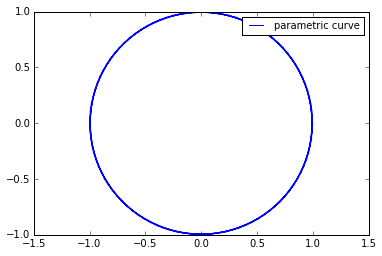

In [1]:
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca()
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
r =  1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, label='parametric curve')
ax.legend()
plt.axes().set_aspect('equal', 'datalim')

<div style="background:red">Theorem</div>
   if $\mathbf r= \mathbf r(t)$ is a regular parametric representation on $\mathbf I$ then for each $t_0$ in $\mathbf I$ there exists a neighbourhood of $t_0$ in which $\mathbf r(t)$ is one to one.<br>
   <br>
   This means that for each $t$ there is a unique point given by the curve. In the example of the circle, the function is one to many, or infinitely many multiples of the same point, this can be fixed by setting the interval to be between $0 < t < 2\pi$ to ensure that the curve only cyles once for all given values of $t$. <br>

 <div style="background:red">Change of Parameter</div>
 For a curve $\mathbf r=\mathbf r(\theta)$ on the interval $\mathbf I$ the real valued function $\theta=\theta(t)$ on the interval $\mathbf I_{t}$ is an allowable change of parameter if<br>
 $i) \quad \theta=\theta(t)$ is of class $C^1$ in $\mathbf I_{t}$. <br>
 $ii) \quad d\theta/d t \neq 0$ for all $t$ in $\mathbf I_{t}$ <br>
 <br>
 If $\theta=\theta(t)$ is an allowable change of parameter then $d\theta/dt$ is continuous and not equal to zero so is either greater than zero (smooth increasing) or less than zero (smooth decreasing).  
 <br>

 <div style="background:red">Theorem</div>
 If $\theta=\theta(t)$ is an allowable change of parameter for a function $\mathbf r=\mathbf r(\theta)$ then <br>
 $i) \quad\theta=\theta(t)$ is a one to one mapping of $\mathbf I_{t}$ onto an interval $\mathbf I_{\theta}=\theta(\mathbf I_t)$<br>
 $ii)\quad$ The inverse function $t=t(\theta)$ is an allowable change of parameter on $\mathbf I_{\theta}$.

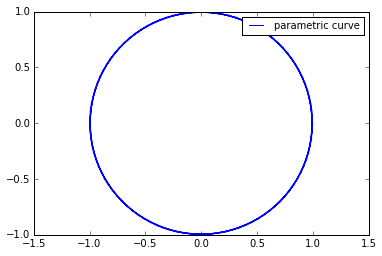

In [2]:
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca()
t = np.linspace(-4, 4, 100)
r =  1
theta = np.pi*t
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, label='parametric curve')
ax.legend()
plt.axes().set_aspect('equal', 'datalim')

 <div style="background:red">Defintion</div>
 A regular parametric representation $\mathbf r=\mathbf r(\theta)$ for $\theta \epsilon \mathbf I_{\theta}$ is equivalent to a regular parametric representation $\mathbf r=\mathbf {\bar r}(t)$ for $t \epsilon \mathbf I_t$ if there exists an allowable change of parameter $\theta=\theta(t)$ on $\mathbf I_t$  such that <br>
 $$
 i)\quad \theta(\mathbf I_{t}) = \mathbf I_{\theta} \qquad ii)\quad \mathbf r(\theta(t))=\mathbf{\bar r}(t)
 $$
 <br>
 This defines an equivalence relation on a set of regular representations. A regular curve can be defined as an equivalence class of regular parameteric representations. <br>
 Since a curve  $\mathbf r=\mathbf r(\theta)$ uniquely determines a curve $C$ and all representations related to it by an allowable change of parameter, any properties of the  $\mathbf r=\mathbf r(\theta)$ may not neccessarily be a property of the curve and may be properties of the parameter. Any properties of the curve must be independant of the parameter.<br>

<div style="background:red">Definition</div>
   <br>
   A regular curve  $\mathbf r = \mathbf r(t)$ on $t\epsilon \mathbf I $ is said to be simple if there are no multiple points and $t_1\neq t_2$ implies $\mathbf r(t_1)\neq \mathbf r(t_2)$. This is a property of the curve and not of the representation.
   If the interval $a\leq t\leq b$ is assigned then the curve $\mathbf r=\mathbf r(t)$ is called a regular arc and the points $\mathbf r(a)$ and $\mathbf r(b)$ are called the end points of the arc. An arc segment $\mathbf b = \mathbf r(t)$ for $a\leq t\leq b$ is the result of defining the interval $(a,b)$ of the arc as a subset of the interval of the curve $\mathbf I$ <br>
   A regular oriented curve is a curve along which a specific direction is chosen for an increase in the parameter. This can change for allowable reparameterizations because sometimes the derivative of the parameter with respect to its parameter is negative rather than positive, signifying a change in direction. 

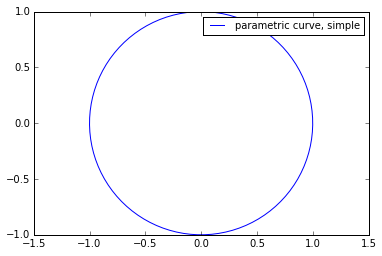

In [3]:
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca()
theta = np.linspace(0, 2 * np.pi, 100)
r =  1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, label='parametric curve, simple')
ax.legend()
plt.axes().set_aspect('equal', 'datalim')

<div style="background:red">Orthogonal projections</div>
    To project a curve onto a coordinate plane defined by the basis constitutes an orthogonal projection. This is achieved by setting the non-related component to zero ... i.e. <br>
    $$
    r_1=r_1(t)\qquad r_2=r_2(t)\qquad r_3=r_3(t)
    $$
    and to project onto the $\mathbf e_1 \mathbf e_2$ plane the parameter $r_3$ is set equal to zero. And likewise for the other planes.

C:\Users\dave\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


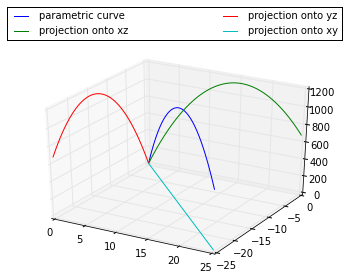

In [2]:
from matplotlib import cm
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
t = np.linspace(0, 25, 100)

# initial velocity
ux = 1
uy = -1
uz = 150

# acceleration due to gravity
a = -9.81

# x and y are initial velocity times time
x = ux*t
y = uy*t

# now the parabola
z = uz * t +0.5*a*t**2  

ax.plot(x, y, z, label='parametric curve')
y = 0 * t
ax.plot(x, y, z, label='projection onto xz')
y = uy * t
x = 0*t
ax.plot(x, y, z, label='projection onto yz')
x= ux * t
z =0 * t
ax.plot(x, y, z, label='projection onto xy')
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
#ax.legend()

<div style="background:red">Implicit representations of Curves</div>
    A curve may be represented implicitly as the intersection of two surfaces, or as the locus of points $x_1,\ x_2,\ x_3$ satisfying the relations <br>
    $$
    F_1(x_1,x_2,x_3)=0\qquad \qquad F_2(x_1,x_2,x_3)=0
    $$
    These equations can be solved if <br>
    $$
    \left |\begin{array}{ccc} \frac{\partial F_1}{\partial x_1} &  \frac{\partial F_1}{\partial x_2} \\  \frac{\partial F_2}{\partial x_1} &  \frac{\partial F_2}{\partial x_2} \end{array}\right|
    $$
    Then the curve can be represented as $x_1=x_1(x_3)$, $x_2=x_2(x_3)$. requires example.

### Arc Length
   
An arc length can be defined in terms of approximating vectors created by subdividing the interval into discrete subdivisions and evaluating the vector function at those points, creating an approximating polygonal arc. The approximate arc length is considered to be the sum of all these vectors and the arc length of the curve is the greatest of lengths of all possible approximating polygonal arcs. An arc $\mathbf r=\mathbf r(t)$ is said to have an approximating polygonal arc $S$ with an interval subdivision $\delta t$ and the arc is said to be rectifiable if the set of all $S$ is bounded from above, or has a supremum which is defined to be the length of the arc. This can be found using limits. 
   
A regular arc $\mathbf r=\mathbf r(t)$ on the interval $a \leq t \leq b$ is rectifiable and the length is given by the integral
   
$$
s = \displaystyle \int_a^b \left | \frac{d\mathbf r}{dt}\right | dt = \int_a^b \sqrt { \left(\frac{dx_1}{dt}\right)^2 +\left(\frac{dx_2}{dt}\right)^2+\left(\frac{dx_3}{dt}\right)^2}dt 
$$


<div style="background:red">Example</div>
    For the circle $\mathbf r(\theta)=r\cos(\theta)\mathbf e_1 + r\sin(\theta)\mathbf e_2$ on the interval $0 < \theta_i < \theta $ we consider the intergral <br>
    $$
    s = \displaystyle \int_0^{\theta}  \sqrt { \left(\frac{dx_1}{d\theta}\right)^2 +\left(\frac{dx_2}{d\theta}\right)^2 } d\theta  
    $$
    evaluating
    $$
    s=\displaystyle \int_0^{\theta}  \sqrt { r^2 \cos^2(\theta) +r^2 \sin^2(\theta) } d\theta =  \int_0^{\theta}  r d\theta  = [r\theta]_0^{\theta} = r \theta 
    $$
    and so $\theta = \frac{s}{r}$  and the natural representation is  $\mathbf r(s/r)=r\cos(s/r)\mathbf e_1 + r\sin(s/r)\mathbf e_2$. This is checked easily by setting the limit $s=2\pi r$ and we find the final point in $\theta$ is $2\pi$.
    <br>

<div style="background:red"><h2>Curvature and Torsion</h2></div><br>
    A regular curve can be uniquely determined by two scalar quantities, curvature and torsion. <br>

<div style="background:red">Unit Tangent Vector</div>
If $\mathbf r=\mathbf r(s)$ is a natural representation of a regular curve C then the tangent to the curve is 
       
$$
\displaystyle \mathbf{\dot r}(s) = \frac{d\mathbf r}{ds} =\lim_{\Delta s \to 0} \frac{ \mathbf r(s+\Delta s)-\mathbf r(s)}{\Delta s}
$$
   
Where the quantity $\frac{ \mathbf r(s+\Delta s)-\mathbf r(s)}{\Delta s}$ is a secant to the curve C. The vector $\mathbf {\dot r}$ is of unit length in the natural representation. If $\mathbf r=\mathbf r(\bar s)$ is any other natural representation then 

$$
\frac{d\mathbf r}{d\bar s} = \frac{d \mathbf r}{ds}\frac{ds}{d\bar s} = \pm \frac{d \mathbf r}{ds} 
$$

since the direction can be the same or opposite. The unit tangent vector can be denoted $\mathbf t=\mathbf t(s)=\mathbf {\dot r}(s)$. 
   

In [3]:
e = CoordSysCartesian('e')

t,s = symbols('t,s')

r = 2*s * e.i + cos(2*s)*e.j + (sin(s)+s+3) * e.k

def unit_tangent_natural(r,s):
    return diff(r,s)

def unit_tangent_time(r,t):
    drdt = unit_tangent_natural(r,t)
    return drdt / drdt.magnitude()


<div style="background:red">Definition</div><br>
If $\mathbf r=\mathbf r(t)$ is an abritrary representation of C with the same orientation as $\mathbf r=\mathbf r(s)$ then 

$$
\mathbf r' = \frac{d\mathbf r}{dt} = \frac{d \mathbf r}{ds}\frac{ds}{dt} = \mathbf t\ \left|\frac{d \mathbf r}{dt}\right| = \mathbf t\ |\mathbf r'| 
$$
   
since 
$$
\frac{ds}{dt} = \left | \frac{d\mathbf r}{dt}\right| 
$$

<div style="background:red">Tangent Line and Normal Plane</div><br>
    The straight line through a point $\mathbf r$ on a regular curve $C$ parallel to the tangent vectors at $\mathbf r$ is called a tangent line to $C$ at $\mathbf r$. <br>
    $$
    \mathbf r = \mathbf r_0 + k \mathbf t_0 \qquad\qquad -\infty < k < \infty
    $$
    Where $\mathbf t_0=\mathbf t(t_0)$ is the unit tangent of $\mathbf r$ at $t=t_0$. The plane through $\mathbf r$ orthogonal to the tangent line is called the normal plane. 

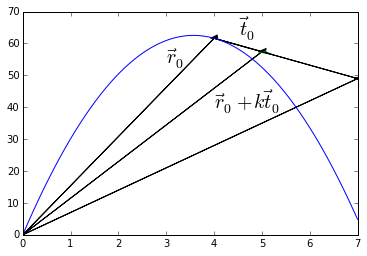

In [4]:
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.gca()
t = np.linspace(0, 7, 100)

# initial velocity
ux = 1
uy = -1
uz = 35

v = (ux**2 + uy**2 + uz**2)**(0.5)

# acceleration due to gravity
a = -9.81

# x and y are initial velocity times time
x = ux*t
y = uy*t

# now the parabola
z = v * t +0.5*a*t**2  

ax.plot(x, z, label='parabola')
t0 = 4
t1 = 6
z_t0 = v*t0 + 0.5 * a * t0**2
z_t1 = v*t1 + 0.5 * a * t1**2

# tangent T at t0
T_t0z = v + a*t0

T_t0x = 1
 

ax.arrow(0, 0, t0, z_t0, head_width=0.15, head_length=1.0, fc='k', ec='k')
ax.arrow(0, 0,t0+ 1, ( T_t0z +z_t0) , head_width=0.15, head_length=1.0, fc='k', ec='k')
ax.arrow(0, 0,t0+ 3, ( 3*T_t0z +z_t0) , head_width=0.15, head_length=1.0, fc='k', ec='k')
ax.arrow(t0, z_t0, T_t0x, ( T_t0z) , head_width=0.15, head_length=1.0, fc='g', ec='g')
ax.arrow(t0, z_t0, 3*T_t0x, 3*( T_t0z) , head_width=0.15, head_length=1.0, fc='k', ec='k')
tex = r'$  \vec r_0$'

ax.text(t0-1, z_t0-10, tex, fontsize=20, va='bottom')

tex = r'$  \vec r_0 + k\vec t_0$'

ax.text(t1-2, ( T_t0z +z_t0)-20, tex, fontsize=20, va='bottom')

tex = r'$ \vec t_0$'

ax.text(t0+0.5, ( T_t0z +z_t0)+3, tex, fontsize=20, va='bottom')

In [5]:
# variable c instead of k, because k is the curvature vector below

def tangent_line_natural(r,s,c):
    tangent = unit_tangent_natural(r,s)
    return r + c * tangent

def tangent_line_natural_at_point(r,s,s0,c,c0):
    return tangent_line_natural(r,s,c).subs({s:s0,c:c0}) 

def tangent_line_time(r,t,c):
    tangent = unit_tangent_time(r,t)
    return r + c * tangent

def tangent_line_time_at_point(r,t,t0,c, c0):
    return  tangent_line_time(r,t,c).subs({t:t0,c:c0}) 

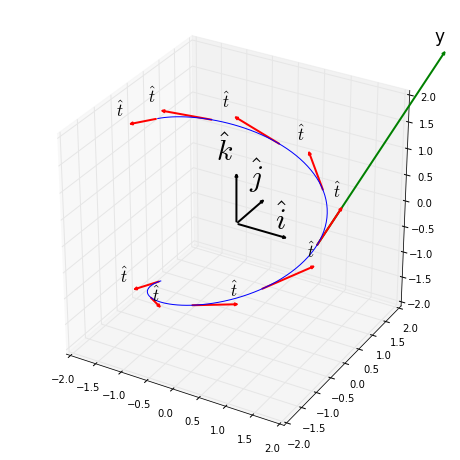

In [40]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
theta = np.linspace(-np.pi, np.pi, 100)

theta_2 = symbols('theta_2')
r = 1.5*cos(theta_2)*e.i + 1.5*sin(theta_2)*e.j + theta_2/2*e.k

fx = lambdify( theta_2, r.dot(e.i)  ,"numpy")
fy = lambdify( theta_2, r.dot(e.j) ,"numpy")
fz = lambdify( theta_2, r.dot(e.k) ,"numpy")

# plot the lambda funcs
ax.plot(fx(theta),fy(theta),fz(theta))

PlotBasisCartesian()

# compute the tangent
tangent = unit_tangent_time(r,theta_2)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

tangent_line = tangent * 5
plot_arrow(r.subs({theta_2:0}), tangent_line.subs({theta_2:0}), e, "y",'g')

for i in range(0,9):
    plot_arrow(r.subs({theta_2:i*2*pi/8-pi}), tangent.subs({theta_2:i*2*pi/8-pi}), e, r'$\hat{t}$','r')
    



<div style="background:red">Definition of Normal Plane</div><br>
    The normal plane at $\mathbf r_0$ is <br>
    $$
    (\mathbf r-\mathbf r_0)\cdot \mathbf t_0 = 0
    $$
    introducing a second variable $\mathbf r$ we can define the tangent line as $\mathbf y = \mathbf r + k \mathbf t$ for the same range of $k$. The normal plane would then be $(\mathbf y-\mathbf r)\cdot \mathbf t = 0$. It should be noted that $\mathbf r'$ is parallel to $\mathbf t$ so <br>
    $$
    \mathbf y= \mathbf r + k \mathbf r' \qquad\qquad -\infty < k < \infty\\ \ \\
     (\mathbf y-\mathbf r_0)\cdot \mathbf r' = 0
    $$
    also define the tangent line and normal plane.

In [6]:
def normal_plane_natural(r, s, s0):
    tangent = unit_tangent_natural(r,s)
    return (r-r.subs({s:s0})).dot(tangent.subs({s:s0}))

def normal_plane_time(r,t,t0):
    tangent = unit_tangent_time(r,t)
    return (r-r.subs({t:t0})).dot(tangent.subs({t:t0}))


In [125]:
from __future__ import division
def plot_plane(p,n,ax):
    d = -float(p.dot(n))
    #point  = np.array([p.dot(e.i), p.dot(e.j), p.dot(e.k)])
    #normal = np.array([n.dot(e.i), n.dot(e.j), n.dot(e.k)])
    #d = -point.dot(normal)
    xx, yy = np.meshgrid(range(3), range(3))
    Nx= float(n.dot(e.i))
    Ny= float(n.dot(e.j))
    Nz= float(n.dot(e.k))
    z = (-Nx * xx - Ny * yy - d)*1. /Nz
    ax.plot_surface(xx, yy, z,rstride=1, cstride=1,color ='g',alpha=0.5, linewidth=0)

(0, 10)

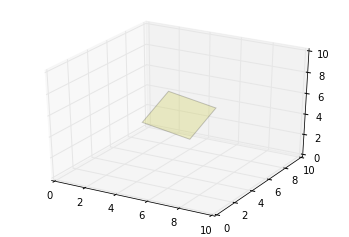

In [121]:
#https://stackoverflow.com/questions/3461869/plot-a-plane-based-on-a-normal-vector-and-a-point-in-matlab-or-matplotlib
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import Circle, PathPatch, Rectangle
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
from mpl_toolkits.mplot3d import art3d
import numpy as np

def plot_vector(fig, orig, v, color='blue'):
   ax = fig.gca(projection='3d')
   orig = np.array(orig); v=np.array(v)
   ax.quiver(orig[0], orig[1], orig[2], v[0], v[1], v[2],color=color)
   ax.set_xlim(0,10);ax.set_ylim(0,10);ax.set_zlim(0,10)
   ax = fig.gca(projection='3d')  
   return fig

def rotation_matrix(d):
    sin_angle = np.linalg.norm(d)
    if sin_angle == 0:return np.identity(3)
    d /= sin_angle
    eye = np.eye(3)
    ddt = np.outer(d, d)
    skew = np.array([[    0,  d[2],  -d[1]],
                  [-d[2],     0,  d[0]],
                  [d[1], -d[0],    0]], dtype=np.float64)

    M = ddt + np.sqrt(1 - sin_angle**2) * (eye - ddt) + sin_angle * skew
    return M

def pathpatch_2d_to_3d(pathpatch, z, normal):
    if type(normal) is str: #Translate strings to normal vectors
        index = "xyz".index(normal)
        normal = np.roll((1.0,0,0), index)

    normal /= np.linalg.norm(normal) #Make sure the vector is normalised
    path = pathpatch.get_path() #Get the path and the associated transform
    trans = pathpatch.get_patch_transform()

    path = trans.transform_path(path) #Apply the transform

    pathpatch.__class__ = art3d.PathPatch3D #Change the class
    pathpatch._code3d = path.codes #Copy the codes
    pathpatch._facecolor3d = pathpatch.get_facecolor #Get the face color    

    verts = path.vertices #Get the vertices in 2D

    d = np.cross(normal, (0, 0, 1)) #Obtain the rotation vector    
    M = rotation_matrix(d) #Get the rotation matrix

    pathpatch._segment3d = np.array([np.dot(M, (x, y, 0)) + (0, 0, z) for x, y in verts])

def pathpatch_translate(pathpatch, delta):
    pathpatch._segment3d += delta

def plot_plane2(ax, point, normal, size=10, color='y'):   
    p = Rectangle((-size/2,-size/2), size, size, facecolor = color, alpha = .2)
    #circle = mpatches.Circle(grid[0], 0.1, ec="none")
    #p = Circle((0, 0), size, facecolor = color, alpha = .2)
    ax.add_patch(p)
    pathpatch_2d_to_3d(p, z=0, normal=normal)
    pathpatch_translate(p, (point[0], point[1], point[2]))


#o = np.array([5,5,5])
v = np.array([3,3,3])
#n = [0.25, -0.5, 0.5]



def plot_plane3(ax,o,n,size=10,color='y'):
    origin=np.array([float(o.dot(e.i)),float(o.dot(e.j)),float(o.dot(e.k))])
    normal = [float(n.dot(e.i)),float(n.dot(e.j)),float(n.dot(e.k))]
    plot_plane2(ax,origin,normal,size,color)
    
ol = 5.*e.i+ 5.*e.j + 5.*e.k
nl = 0.25*e.i -0.5*e.j +0.5*e.k    

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')  
plot_plane3(ax, ol, nl, size=3)    
ax.set_xlim(0,10);ax.set_ylim(0,10);ax.set_zlim(0,10)
#plt.show()

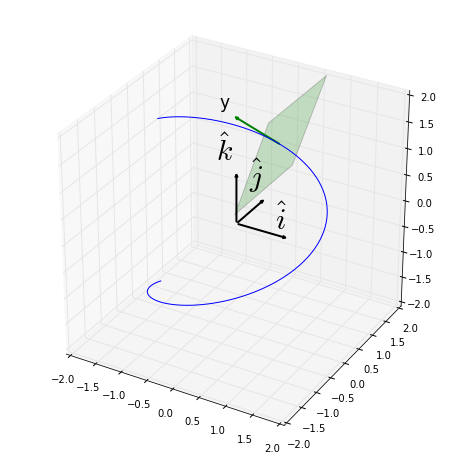

In [128]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
theta = np.linspace(-np.pi, np.pi, 100)

theta_2,theta_3 = symbols('theta_2,theta_3')

r = 1.5*cos(theta_2)*e.i + 1.5*sin(theta_2)*e.j + theta_2/2*e.k
r2 = r.subs({theta_2:theta_3})

fx = lambdify( theta_2, r.dot(e.i)  ,"numpy")
fy = lambdify( theta_2, r.dot(e.j) ,"numpy")
fz = lambdify( theta_2, r.dot(e.k) ,"numpy")

# plot the lambda funcs
ax.plot(fx(theta),fy(theta),fz(theta))

PlotBasisCartesian()

# compute the tangent
tangent = unit_tangent_time(r2,theta_3)

p = r2.subs({theta_3:np.pi/2})
tang =tangent.subs({theta_3:np.pi/2})

plot_plane3(ax,p,tang,size=2,color='g' )


ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

tangent_line = tang * 5
plot_arrow(p, tang, e, "y",'g')

#for i in range(0,9):
#    plot_arrow(r.subs({theta_2:i*2*pi/8-pi}), tangent.subs({theta_2:i*2*pi/8-pi}), e, r'$\hat{t}$','r')

<div style="background:red">Curvature</div><br>
    Assuming that $\mathbf r= \mathbf r(s)$ is a regular curve of class $\geq 2$ then the tangent vector $\mathbf t=\mathbf t(s) = \mathbf {\dot r}(s)$ is of class $C^1$ and the derivative <br>
    $$
    \frac{d\mathbf t}{ds} = \mathbf{\dot t}(s) = \mathbf {\ddot r}(s)
    $$
    is independent of orientation of the curve.



<div style="background:red">Proof</div><br>
     Let $\mathbf r=\mathbf r(\bar s) $ be any other natural representation of the curve C with unit tangent $\mathbf {\bar t}=d\mathbf r/d\bar s$ and $s=\bar s+\epsilon$ where $\epsilon$ is an abritrary constant. Then
        
$$
\frac{d\mathbf {\bar t} }{d\bar s} = \frac{d}{d\bar s}\left(\frac{d\mathbf r}{d \bar s}\right) = \frac{d}{d\bar s}\left(\pm \frac{d\mathbf r}{d  s}\right) =  \pm \frac{d}{d s}\left(\frac{d\mathbf r}{d  s}\right)\frac{ds}{d\bar s} = (\pm 1)^2\frac{d}{ds}\left(\frac{d\mathbf r}{ds}\right) = \frac{d\mathbf t}{ds}
$$

Therefore $\mathbf {\dot t}$ is independant of orientation.

<div style="background:red">Definition</div><br>
    The vector $\mathbf {\dot t}(s)$ is called the curvature vector on $C$ at the point $\mathbf r(s)$ and is denoted by $\mathbf k=\mathbf k(s)=\mathbf{\dot t}(s)$.  The vector $\mathbf k$ is orthogonal to $\mathbf t$ and also parallel to the normal plane. When greater than zero it is in the direction that the curve is turning. The magnitude of the curvature vector is 
   
$$
|\kappa| = |\mathbf k(s)| 
$$
   
and is called the curvature of $C$ at $\mathbf r(s)$ . The reciprocal of the curvature is called the radius of curvature $\rho = \frac{1}{|\kappa|}$ . 
    


In [9]:
def curv_vec_natural(r, s):
    tangent = unit_tangent_natural(r,s)
    return diff(tangent, s)

def curv_vec_from_tangent(tangent, s):
    return diff(tangent,s)

def curvature_natural(r,s):
    return curv_vec_natural(r,s).magnitude()

def curv_mag(k):
    return k.magnitude()

def rad_of_curv_natural(r,s):
    return 1/curvature_natural(r,s)

def rad_of_curv_from_curv_vec(k):
    return 1/curv_mag(k)

<div style="background:red">Definition</div><br>
    The curvature is equal to the rate of change of the direction of the tangent with respect to arc length.

<div style="background:red">Definition</div><br>
    If the curvature is zero all along a curve then the curve is a straight line. 

<div style="background:red">Definition</div><br>
    An identity to calculate the curvature is <br>
    $$
    |\kappa|=\frac{|\mathbf r'\times\mathbf r''|}{|\mathbf r'|^3}
    $$

In [10]:
def curvature_time(r,t):
    rprime1 = diff(r,t)
    rprime2 = diff(rprime,t)
    return (rprime1.cross(rprime2)).magnitude() / (rprime.magnitude()**3)


<div style="background:red">Principal Normal Vector</div><br>
    If $C$ is of class $\geq 2$ the curvature vector varies continuously along $C$ and the unit vector in the direction of $\mathbf k$ is not defined where $\mathbf k=0$ and may have discontinuities. The principle normal is defined as 
   
$$
\mathbf n = \frac{\mathbf k(s)}{|\mathbf k(s)|}
$$
   
and is defined to be continuous along $C$ when possible. From the definition of curvature
   
$$
\mathbf k(s) = \kappa(s) \mathbf n(s)
$$
       
where $\mathbf n$ has the same direction as $\mathbf k$ we have $\kappa = |\mathbf k|$ and when $\mathbf n$ has the opposite direction then $\kappa = -|\mathbf k|$. At the point of inflection both $\mathbf k$ and $\kappa$ equal zero. Also the identity $\mathbf n\cdot\mathbf n=1$ can be used to multiply both sides of the equation by $\mathbf n$ to give 
   
$$
\kappa = \mathbf k(s)\cdot \mathbf n(s)
$$
   
A curve of class $C^{\infty}$ may not have a definite principle normal at a point of inflection. If the curve is analytic then a continuous principal normal will always exist. (if it is not a straight line).

In [13]:
def principle_normal_natural(r,s):
    k = curv_vec_natural(r,s)
    return k/k.magnitude()

def principle_normal_from_curv_vec(k):
    return k / k.magnitude()

def principle_normal_from_tangent(tangent,s):
    k = diff(tangent,s)
    return k / k.magnitude()

<div style="background:red">Osculating Plane</div><br>
      Analagous to the equations above the principal normal line to $C$ at $\mathbf r$ is given by 
      
$$
\mathbf y = \mathbf r + k\mathbf n\qquad -\infty < k < \infty 
$$
   
And the plane parallel to the unit tangent and the principal normal is 
   
$$
[(\mathbf y - \mathbf r)\mathbf t \mathbf n] = 0
$$
   
as given by the scalar triple product. This can also be written 

$$
[(\mathbf y - \mathbf r)\mathbf{ \dot r} \mathbf {\ddot r}] = 0
$$      
   
The osculating plane at a point can be defined as the limiting position of a plane passing through three neighbouring points on a curve as the points approach the given point or as the distance between the intersection points and the given point of evaluation tends to zero. This is a definition of the order of contact with a curve.  

In [14]:
def osculating_plane_natural(y,r,s):
    tangent = diff(r,s)
    normal = diff(tangent,s)
    normal = normal / normal.magnitude()
    bi = tangent.cross(normal)
    return (y-r).dot(bi)


<div style="background:red">Binormal</div><br>
       The vector <br>
       $$
       \mathbf b(s) = \mathbf t(s) \times \mathbf n(s)
       $$
       is defined as the binormal vector to the curve, and is orthogonal to both the tangent and the principal normal. The vector $\mathbf b$ is continuous and of unit length and the three vectors $(\mathbf t, \mathbf n, \mathbf b)$ form a right handed orthonormal triplet or basis. This is called the moving trihedral. The straight line through $\mathbf r$ parallel to $\mathbf b$ is <br>
       $$
       \mathbf y = \mathbf r + k\mathbf b\qquad -\infty < k < \infty
       $$
       and the plane parallel to $\mathbf b$ and $\mathbf t$ is called the rectifying plane <br>
       $$
       (\mathbf y - \mathbf r)\cdot \mathbf n = 0
       $$

In [15]:
def binormal_natural(r,s):
    tangent = diff(r,s)
    norm = diff(tangent,s)
    norm = norm/norm.magnitude()
    return tangent.cross(normal)

def binormal_natural_from_tangent(tanget,s):
    norm = diff(tangent,s)
    norm = norm/norm.magnitude()
    return tangent.cross(normal)

def binormal_from_tangent_normal(tanget,normal):
    return tangent.cross(normal)

def binormal_line(r,s,c):
    bi = binormal_natural(r,s)
    return r + c*bi

def binormal_line_at_point(r,s,s0,c,c0):
    return binormal_line(r,s,c).subs({s:s0,c:c0})


<div style="background:red">Torsion</div><br>
       If the curve $\mathbf r=\mathbf r(s)$ is a regular curve of class $\geq 3$ along which $\mathbf n(s)$ is of class $C^1$ then differentiating the binormal 
          
$$
\mathbf {\dot b}(s) = \mathbf{\dot t}(s) \times \mathbf{n}(s)+ \mathbf t(s) \times \mathbf{\dot n}(s)= \kappa(s)[ \mathbf n(s)\times \mathbf n(s)] + \mathbf t(s) \times \mathbf {\dot n}(s)= \mathbf t(s)\times\mathbf{\dot n}(s)
$$
          
since $\mathbf a\times \mathbf a=0$. If we claim that $\mathbf{\dot n}$ is a linear combination of $\mathbf t$ and $\mathbf b$ then 
          
$$
\mathbf {\dot n}(s) = \mu(s)\mathbf t(s) + \tau(s)\mathbf b(s)
$$
          
and substitution reveals that 
          
$$
\mathbf {\dot b}(s) = -\tau(s) \mathbf n(s)
$$
          
where the quantity $\tau(s)$ is called the torsion of the curve. This can be defined in a method analogous to the curvature above 
          
$$
\tau = -\mathbf{\dot b}(s)\cdot \mathbf n(s)
$$
          
The sign of $\tau$ is independant of the orientation of C and the direction of $\mathbf n$ and is an intrinsic property of the curve.

In [17]:
def torsion_natural(r,s):
    tangent = unit_tangent_natural(r,s)
    normal = diff(tangent,s)
    normal = normal/normal.magnitude()
    binormal = tangent.cross(normal)
    dbds = diff(binormal, s)
    return -dbds.dot(normal)
    
def torsion_from_tangent_normal(tangent,normal,s):
    binormal = tangent.cross(normal)
    dbds = diff(binormal, s)
    return -dbds.dot(normal)

def torsion_from_normal_binormal(normal,binormal,s):
    dbds = diff(binormal, s)
    return -dbds.dot(normal)

def dbds_natural(r,s):
    tangent = unit_tangent_natural(r,s)
    normal = diff(tangent,s)
    normal = normal/normal.magnitude()
    binormal = tangent.cross(normal)
    return diff(binormal, s)

def torsion_from_dbds_normal(dbds,normal):
    return -dbds.dot(normal)



<div style="background:red">Definition</div><br>
       The torsion of a plane curve is zero and a curve except for a straight line has zero torision if it is a plane curve.

<div style="background:red">Spherical Indicatrices</div><br>
       The unit vectors on a curve $C$ generate a a curve on a sphere of radius 1. These curves are called spherical indicatrices.
       <br>

<div style="background:red"><h2>Theory</h2></div><br>
            
<div style="background:red">Serret-Frenet equations</div><br>
For a curve $\mathbf r(s)$ The three equations <br>

                 
$$\begin{array}{rcl}
\mathbf{\dot t}	&	=	&	&\ \kappa \mathbf n &     \\
\mathbf{\dot n}	&	=	&	-\kappa \mathbf t & + & \tau \mathbf b    \\
\mathbf{\dot b}	&	=	&	& -\tau \mathbf n &  \\
 	 	 	 	\end{array}$$                 
                
and these can be written in matrix notation as 
   
$$\dot{\mathbf v} = \mathbf A \mathbf v $$ 


<br> 
Where $\dot{\mathbf v} = ( \mathbf {\dot t},\mathbf {\dot n} ,\mathbf {\dot b}  )^T$ and $\mathbf v = (\mathbf t, \mathbf n,\mathbf b)^T$ and the matrix $\mathbf A$ is 
   
$$\left(\begin{array}{ccc} 0& \kappa &0\\ -\kappa & 0 & \tau \\ 0&-\tau &0 \end{array}\right)$$

These equations can be used to prove that a curve is uniquely defined by its curvature and torsion as functions of a natural parameter, and these functions are intrinsic to the curve, or features of the intrinsic geometry of the curve. If two curves have the same curvature and torsion as functions of a natural parameter, then they are the same except for their position in space.
               

In [18]:

# 5) plot frenet frame given T and N at point o    
def plot_frenet_frame(o,T,N,e,col):
    plot_arrow(o,T,e,r'$ \hat{T}$',col)
    plot_arrow(o,N,e,r'$ \hat{N}$',col)
    B = T.cross(N)
    B = B/ B.magnitude()
    plot_arrow(o,B,e,r'$ \hat{B}$',col)

 <div style="background:red">Existence and Uniqueness Theorem</div><br>
                 The Serret-Frenet equations form a system of 3 first order vector differential equations. Given a curvature $\kappa (s)$ and a torsion $\tau(s)$ then apart from the position in space there exists only one unique space curve that satisfies the equations with $s$ as the natural parameter. 
                 <br> note: this is always possible in the case of a plane curve. <br>

<div style="background:red">Involutes</div><br>
                  The tangent lines to a curve $C$ generate a surface called the tangent surface of the curve. A curve $ C_1$ that lies on the tangent surface of $C$ and intersects the tangent lines of $C$  orthogonally is called and involute of $C$. <br>
                  If $\mathbf r=\mathbf r(s)$ and $\mathbf {\bar r}$ is a point on an involute $C_1$ where it intersects with the tangent line of $C$ at $\mathbf r(s)$ then $\mathbf{\bar r}-\mathbf r(s)$ is proportional to $\mathbf t(s)$, the tangent to $C$. Therefore $C_1$ will have a representation <br>
                  $$\mathbf{\bar r}=\mathbf r(s) + k(s)\mathbf t(s)$$
and the rate of change with respect to $s$ is defined as <br>
$$\frac{d\mathbf{\bar r}}{ds} = \mathbf{\dot r} + \dot k \mathbf t + k \mathbf {\dot t} = (1+\dot k)\mathbf t + k\kappa \mathbf n$$
                  is orthogonal to the tangent vector $\mathbf t$ on $C$, this can be shown by computing $(d\mathbf{\bar r}/ds )\cdot \mathbf t = 1+\dot k = 0$ using the above equation. Integrating this gives $k=-s+a$ and there is an infinite family of involutes one for each value of the constant of integration, $a$. These can be defined by <br>
                  $$\mathbf{\bar r}=\mathbf r + (a-s)\mathbf t $$
                  by substituting for $k$ in the above relations. The involute is not regular where the curve $C$ has a point of inflection, and the value $d\mathbf {\bar r}/ds = 0$ where $\kappa=0$. 

  <div style="background:red">Identity</div><br>
                  The curvature of the involute satisfies <br>
                  $$
                  \bar \kappa^2 = \frac{\kappa^2+\tau^2}{(a-s)^2\kappa^2}
                  $$
                  For $\bar \kappa \neq 0$ and $\kappa\neq 0$. <br>
                  It should be noted that if $|\mathbf t|=1$ then the distance between two involutes is constant for all $s$. 

<div style="background:red">Serret-Evolutes</div><br>
                  If $C$ is an involute of a curve $C_1$ then $C_1$ is an evolute of $C$. Let $C$ be denoted by $\mathbf r(s)$ and if $\mathbf {\bar r}(s)$ is the point of contact on the evolute to the tangent line intersecting $C$ at $\mathbf r(s)$ then <br>
                  $$\mathbf{\bar r}(s) = \mathbf r(s) + \alpha (s) \mathbf n (s) + \beta(s) \mathbf b(s)
                  $$
since $\mathbf{\bar r}(s)-\mathbf r(s)$ is orthogonal to $\mathbf t(s)$ and is a linear combination of $\mathbf n(s)$ and $\mathbf b(s)$. Differentiating gives <br>
$$\frac{d \mathbf {\bar r}}{ds} = \mathbf {\dot r} + \dot\alpha\mathbf n + \alpha \mathbf{\dot n} + \dot\beta\mathbf b + \beta\mathbf{\dot b}\\= (1-\alpha\kappa)\mathbf t+ (\dot\alpha-\beta\tau)\mathbf n + (\dot\beta +\tau\alpha)\mathbf b
                  $$
after substituting the frenet equations for the dot terms. This value $(d\mathbf{\bar r}/ds)$ is also tangent to $C_1$ and is proportional to 
                  $$\mathbf{\bar r}-\mathbf r = \alpha \mathbf n + \beta \mathbf b
                  $$
and there exists a $k$ such that (need theorom, suppose this is the tangent line)
                  $$1-\alpha \kappa = 0,\qquad (\dot\alpha-\beta\tau)=k\alpha,\qquad(\dot\beta+\tau\alpha)=k\beta
                  $$
so $\alpha = 1/\kappa$ and the variable $k$ can be eliminated <br>
                  $$\beta(\dot\alpha-\beta\tau)-\alpha(\dot\beta+\tau\alpha)=0
                  $$
and solving for $\tau$ we find <br>
                  $$\tau = \frac{\beta\dot\alpha-\alpha\dot\beta}{\alpha^2+\beta^2} = \frac{d}{ds}\cot^{-1}(\beta/\alpha)
                  $$
and integration gives <br>
                  $$\beta = \alpha \cot\left(\int \tau ds + c \right) = \frac{1}{\kappa} \cot\left(\int \tau ds + c \right) 
                  $$
and this gives an infinite family of evolutes <br>
                  $$\mathbf {\bar r} = \mathbf r + \frac{1}{\kappa} \mathbf n + \frac{1}{\kappa} \cot\left(\int\tau ds +c \right)\mathbf b
                  $$
and so the assumption is that along $C$ the value $(\dot\alpha-\beta\tau)^2+(\dot\beta+\tau\alpha)^2 \neq 0$. If $C$ is a plane curve then $\tau=0$ and $\alpha = \gamma\beta$ with $\gamma$ a constant, and 
                  $$(\dot\alpha-\beta\tau)^2+(\dot\beta+\tau\alpha)^2 = \frac{\dot \kappa^2}{\kappa ^4}(1+\gamma^{-2}).$$
And for plane curves it is assumed that $\dot\kappa \neq 0 $.
                  Needs more information here

<div style="background:red">Definition of contact with a surface</div><br>
                  A curve $\mathbf r=x_1(t)\mathbf e_1 + x_2(t)\mathbf e_2 + x_3(t)\mathbf e_3$ has n-point contact with a surface $F(x_1,x_2,x_3)=0$ at the point corresponding to $t=t_0$ if the function <br>
                  $$f(t)=F(x_1(t),x_2(t),x_3(t))
                  $$
satisfies
                  $$f(t_0)=f'(0)=f''(0)=\cdots=f^{(n-1)}(t_0)=0\qquad but\qquad f^{(n)}(t_0)\neq 0 
                  $$
and this is independant of the parameterization of the curve.

<div style="background:red">Definition of contact with a curve</div><br>
                  A curve $C$ is denoted as $\mathbf r=x_1(t)\mathbf e_1 + x_2(t)\mathbf e_2 + x_3(t)\mathbf e_3$ and a second curve $C_1$ is defined by the intersection of two surfaces $F$ and $G$ both functions of $(x_1,x_2,x_3)$ then the curve  $C$ has n-point contact at $t_0$ if and only if there is n-point contact with one of the surfaces and at least n-point contact with the other.